In [6]:
from qiskit.transpiler.coupling import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.transpiler import PassManager
import numpy as np
from mirror_gates.logging import transpile_benchy_logger
from mirror_gates.sqiswap_decomposer import SiSwapDecomposePass
from qiskit.transpiler.passmanager import PassManager
from qiskit import Aer, transpile
from qiskit.quantum_info import state_fidelity
from qiskit_aer import AerSimulator

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    pauli_error,
    depolarizing_error,
    thermal_relaxation_error,
    RelaxationNoisePass,
)
from qiskit.circuit import Delay
from qiskit.transpiler.passes import PadDelay, ASAPSchedule
from qiskit import QuantumCircuit

In [7]:
from qiskit.circuit.library import SiSwapGate
from mirror_gates.noisy_fidelity import get_noisy_fidelity
from tqdm import tqdm

from qiskit.circuit.random import random_circuit

N = 8
coupling_map = CouplingMap.from_line(N)
data = []
for i in tqdm(range(2, 100, 5)):
    for j in range(3):
        qc = random_circuit(N, i, max_operands=2, measure=False)
        fid, duration, transp = get_noisy_fidelity(qc, coupling_map)
        data.append((duration, fid))

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:59<00:00,  2.98s/it]


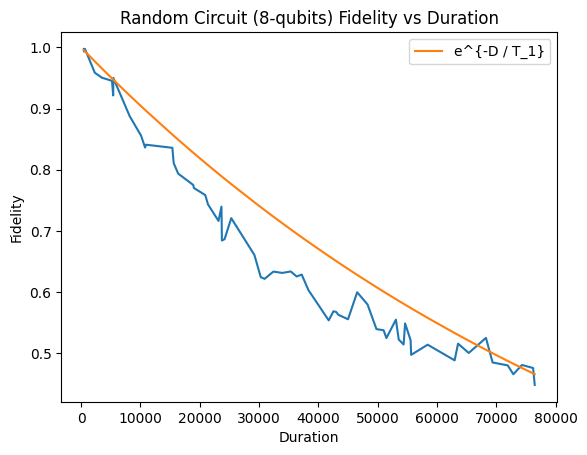

In [8]:
import matplotlib.pyplot as plt

# sort by duration
data = sorted(data, key=lambda x: x[0])
plt.plot(*zip(*data))
plt.xlabel("Duration")
plt.ylabel("Fidelity")
plt.title("Random Circuit (8-qubits) Fidelity vs Duration")

# also plot e^-duration / T1
T1 = 100e3
plt.plot(
    [x[0] for x in data],
    [np.exp(-x[0] / T1) for x in data],
    label="e^{-D / T_1}",
)
plt.legend()